# I.Import et etudes fichiers

In [147]:
# installations et imports des autres packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import fonctions as fc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [205]:
# file path
data_file_path = "DATA\data_standard.csv"
standard = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_robust.csv"
robust = pd.read_csv(data_file_path)
# file path
data_file_path = "DATA\data_minmax.csv"
minmax = pd.read_csv(data_file_path)

In [148]:
# file path
data_file_path = "DATA\data.csv"
data = pd.read_csv(data_file_path)

In [149]:
data.head()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant,Pays
0,-1.640748,-1.193612,0.000000,-0.649493,-0.402473,-1.108822,Afghanistan
1,0.491588,-0.259106,0.189995,0.336682,0.894770,0.044080,Afrique du Sud
2,-0.039494,0.462597,0.000000,0.491070,-0.232230,-0.135996,Albanie
3,-0.795007,-0.807085,0.000000,-1.791128,-0.134871,-0.176583,Algérie
4,0.117503,-0.572858,3.909364,0.386350,0.396982,0.903506,Allemagne


In [150]:
data_num = data.select_dtypes(include=[np.number])
pays = data['Pays']

## POIDS des colonnes

In [151]:
# # Suppose 'column1' and 'column2' are the columns you want to give more weight
# weight = 2  # Change this to the weight you want
# df['column1'] = df['column1'] * weight
# df['column2'] = df['column2'] * weight

# # Then perform the clustering

# V.PCA

In [152]:
import pandas as pd
from sklearn.decomposition import PCA

def apply_pca(X):
    """
    Applique l'Analyse en Composantes Principales (ACP) sur les données X.

    Parameters:
        X (DataFrame): Les données d'entrée.

    Returns:
        pca (PCA): L'objet PCA ajusté.
    """
    # Créer les composantes principales
    pca = PCA()
    X_acp = pca.fit_transform(X)
    # Convertir en dataframe
    noms_composantes = [f"CP{i+1}" for i in range(X_acp.shape[1])]
    X_acp = pd.DataFrame(X_acp, columns=noms_composantes)
    # Créer les chargements
    chargements = pd.DataFrame(
        pca.components_.T,  # transposer la matrice des chargements
        columns=noms_composantes,  # les colonnes sont les composantes principales
        index=X.columns,  # les lignes sont les variables originales
    )
    return pca

def plot_variance(acp, largeur=8, dpi=100):
    """
    Trace les graphiques de la variance expliquée et cumulative de l'ACP.

    Parameters:
        acp (PCA): L'objet PCA ajusté.
        largeur (int): La largeur de la figure.
        dpi (int): La résolution de la figure.

    Returns:
        axs (array): Les axes des graphiques.
    """
    # Créer la figure
    fig, axs = plt.subplots(1, 2)
    n = acp.n_components_
    grille = np.arange(1, n + 1)
    # Variance expliquée
    variance_exp = acp.explained_variance_ratio_
    axs[0].bar(grille, variance_exp)
    axs[0].set(
        xlabel="Composante", title="% Variance Expliquée", ylim=(0.0, 1.0)
    )
    # Variance cumulative
    variance_cumul = np.cumsum(variance_exp)
    axs[1].plot(np.r_[0, grille], np.r_[0, variance_cumul], "o-")
    axs[1].set(
        xlabel="Composante", title="% Variance Cumulative", ylim=(0.0, 1.0)
    )
    # Configurer la figure
    fig.set(figwidth=largeur, dpi=dpi)
    return axs

In [153]:
pca = apply_pca(data_num)

array([<Axes: title={'center': '% Variance Expliquée'}, xlabel='Composante'>,
       <Axes: title={'center': '% Variance Cumulative'}, xlabel='Composante'>],
      dtype=object)

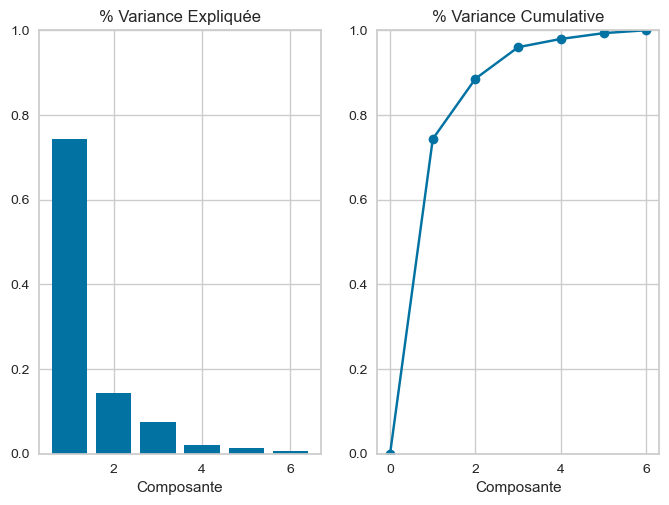

In [154]:
# Call the plot_variance function
plot_variance(pca)

Notre colonne F1 explique à elle seul 74% de l'information contneu dans nos données d'origine.

Nos deux colonnes F1 et F2 explique 89% de l'information contenu dans nos données d'origine.

## ACP 2 components

In [155]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data_num)

PCA(n_components=2)

In [156]:
# Obtenir les composantes principales
pcs = pca.components_

# Convertir les composantes principales en un DataFrame
pcs = pd.DataFrame(pcs)

# Définir les noms des colonnes du DataFrame comme les noms des variables originales
features = data_num.columns
pcs.columns = features

# Définir les index du DataFrame comme les noms des composantes principales (F1, F2)
x_list = list(range(1, len(pcs) + 1))
pcs.index = [f"F{i}" for i in x_list]

# Arrondir les valeurs du DataFrame à deux décimales
pcs.round(2)

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
F1,-0.07,-0.07,-0.99,-0.07,-0.07,-0.09
F2,-0.53,-0.58,0.15,-0.47,-0.19,-0.32


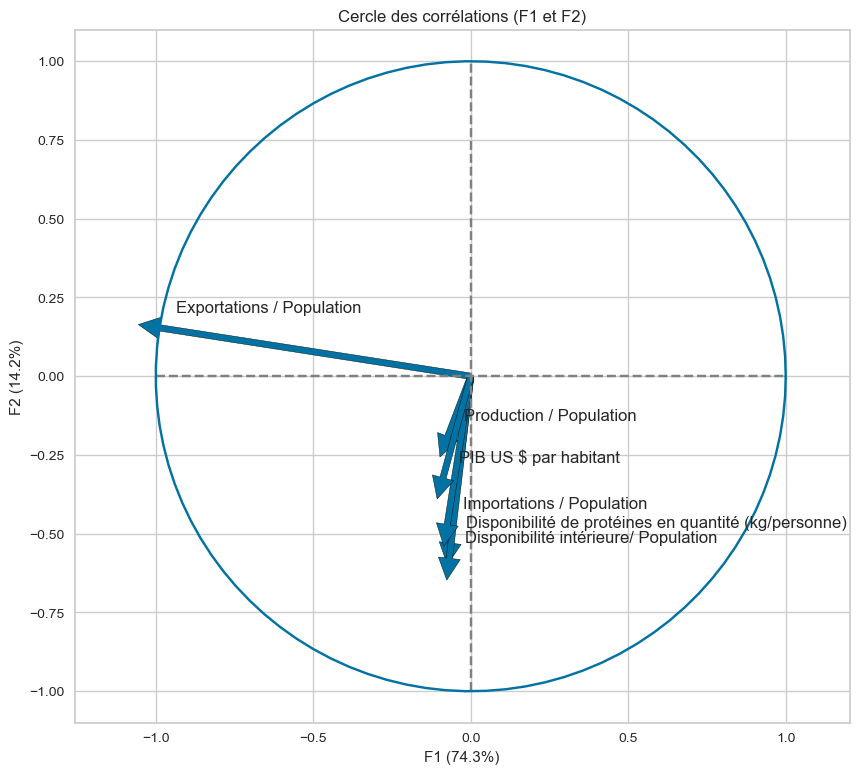

In [157]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

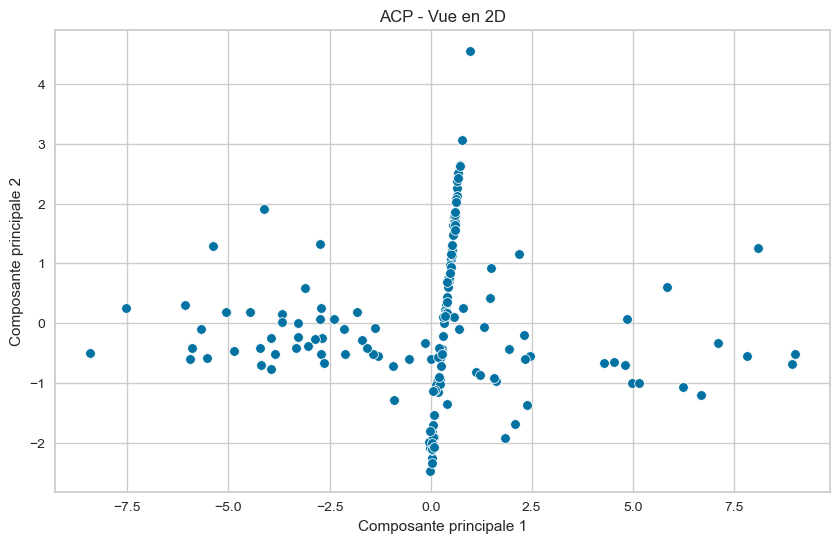

In [158]:
principal_components_pivot = pca.fit_transform(data_num)

# Visualisation des résultats de l'ACP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components_pivot[:, 0], y=principal_components_pivot[:, 1])
plt.title('ACP - Vue en 2D')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

In [159]:
X_proj = pca.transform(data_num)
df = pd.DataFrame(X_proj, columns = ["F1", "F2"])
df_test = df.copy()
df.head()

,F1,F2
0,0.656481,2.131181
1,-0.003014,-0.592848
2,0.256367,-0.557080
3,0.558384,1.645338
4,-3.668311,0.151536


# PIPE  

## Dendogramme

In [160]:
# Créer le pipeline pour le dendogramme
pipe_dendogramme = Pipeline([
    ('scaler', StandardScaler()),
    ('agg', AgglomerativeClustering(n_clusters=3))
])


def create_dendrogram(df, pipe_dendogramme):
    """Crée et affiche un dendrogramme pour un DataFrame donné, en utilisant un pipeline donné."""
    Z = linkage(pipe_dendogramme['scaler'].transform(df), method='ward')
    clusters = fcluster(Z, 3, criterion='maxclust')
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.show()

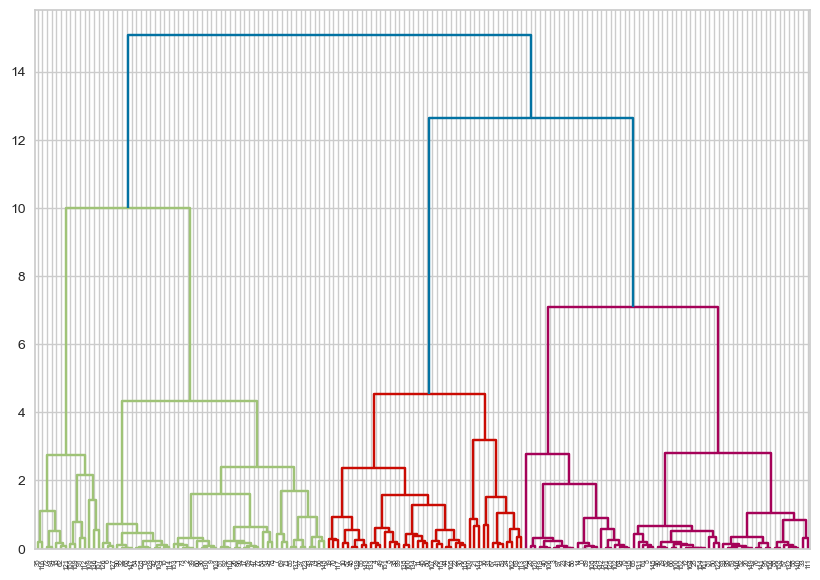

In [161]:
# Ajuster le pipeline
pipe_dendogramme.fit(df)
create_dendrogram(df, pipe_dendogramme)

## Kmeans

In [162]:
# créer le pipeline pour le kmeans
pipe_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3))
])

In [163]:
# ajuster le pipeline]
pipe_kmeans.fit(df)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3))])

# IV.Dendogramme

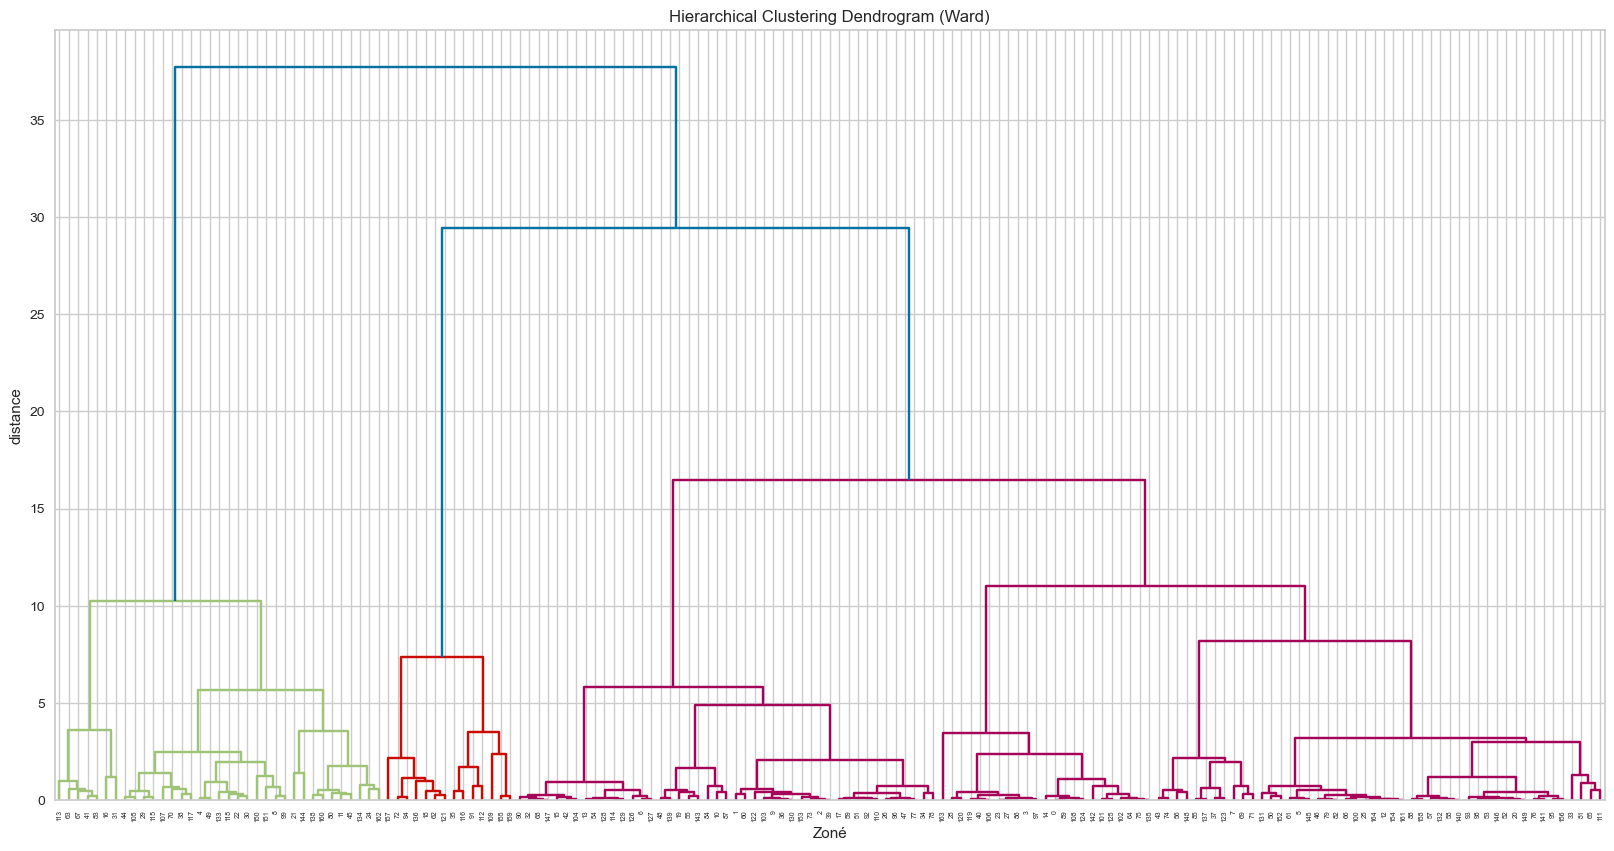

In [164]:
# création du modèle
Z = linkage(df, 'ward')

# Afficher le dendrogramme
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Zoné')
plt.ylabel('distance')
dendrogram(Z,  leaf_rotation=90)
plt.show()

In [165]:
# Coupage du dendrogramme en 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')

# VI.Kmeans

In [166]:
# Import the os module
import os
# Set the environment variable 'OMP_NUM_THREADS' to '1'
os.environ['OMP_NUM_THREADS'] = '1'

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

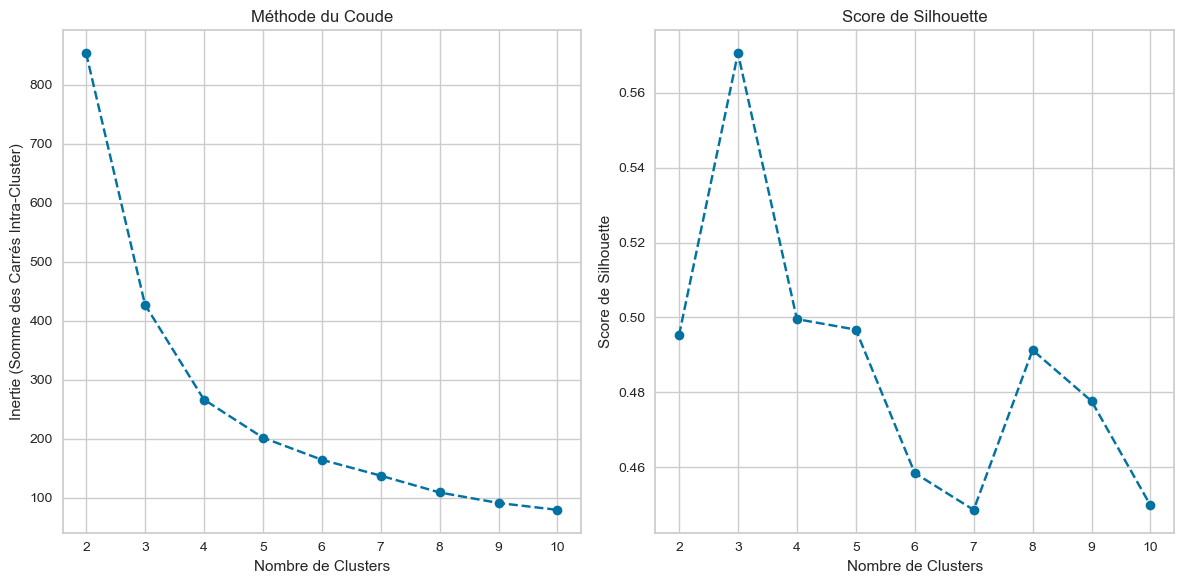

In [167]:
# Définir une plage de nombres de clusters à tester
plage_de_clusters = range(2, 11) 

# Listes pour stocker l'inertie et les scores de silhouette
valeurs_inertie = []
scores_silhouette = []

# Itérer à travers différents nombres de clusters et ajuster K-Means
for n_clusters in plage_de_clusters:
    kmeans_pivot = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters_pivot = kmeans_pivot.fit_predict(df_test)

    # Calculer l'inertie (somme des carrés intra-cluster)
    valeurs_inertie.append(kmeans_pivot.inertia_)

    # Calculer le score de silhouette
    scores_silhouette.append(silhouette_score(df_test, clusters_pivot))

# Tracer la méthode du coude pour déterminer le nombre optimal de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(plage_de_clusters, valeurs_inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (Somme des Carrés Intra-Cluster)')
plt.title('Méthode du Coude')

# Tracer le Score de Silhouette pour déterminer le nombre optimal de clusters
plt.subplot(1, 2, 2)
plt.plot(plage_de_clusters, scores_silhouette, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')

plt.tight_layout()
plt.show()

Méthode du Coude (Elbow Method) :

La Méthode du Coude consiste à trouver le point dans un graphique de l'inertie où la diminution de l'inertie ralentit, formant un coude.
Ce point représente généralement le nombre optimal de clusters dans une analyse de clustering.

Score de Silhouette (Silhouette Score) :

Le Score de Silhouette mesure à quel point les points d'un cluster sont similaires entre eux et différents des autres clusters.
Il varie de -1 à 1, où un score élevé indique une meilleure séparation des clusters.
Le nombre optimal de clusters est généralement celui qui donne le score de silhouette le plus élevé.

In [168]:
# Importer la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Créer une instance de la classe KMeans avec 2 clusters
kmeans = KMeans(n_clusters=3)

# Entraîner le modèle KMeans sur les données numériques
kmeans.fit(df_test)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

On va cherche les labels de nôre Kmeans afin d'attribuer plus tard un cluster à chaque pays

In [169]:
# Obtenir les labels attribués par KMeans à chaque échantillon
labels = kmeans.labels_
labels[:5]

array([0, 0, 0, 0, 1])

In [170]:
df['cluster_kmeans'] = labels  

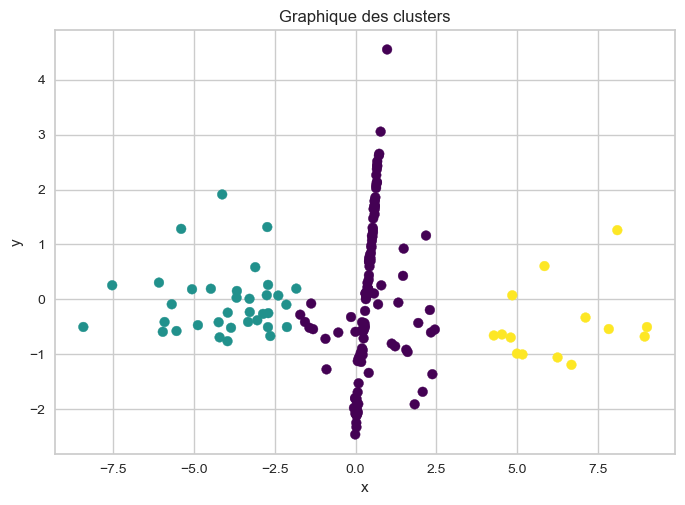

In [171]:
# Créer un graphique de dispersion avec le numéro du cluster et la colormap "viridis"
plt.scatter(df['F1'], df['F2'], c=df['cluster_kmeans'], cmap='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des clusters')

# Afficher le graphique
plt.show()

In [172]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.44625648,  0.07045686],
       [-4.00290557, -0.05150557],
       [ 6.30971026, -0.45502147]])

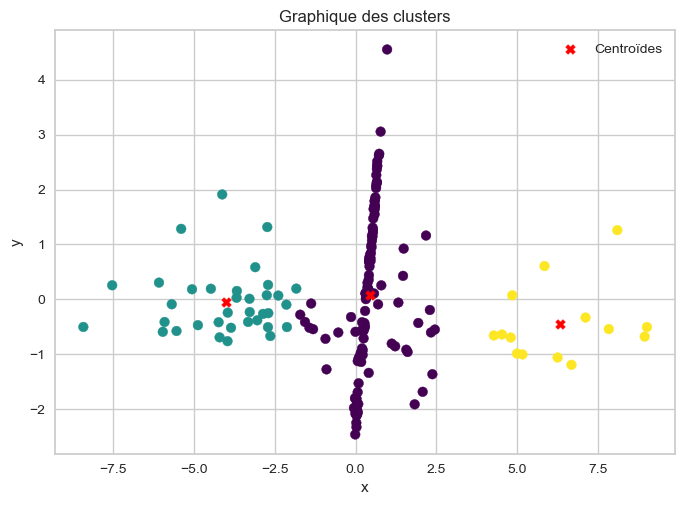

In [173]:
# Créer un graphique de dispersion
plt.scatter(df['F1'], df['F2'], c=df['cluster_kmeans'], cmap='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique des clusters')

# Ajouter les centroïdes au graphique
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Centroïdes')

# Afficher le graphique
plt.legend()
plt.show()

# Reconstruction de notre df apres le clustering

In [174]:
# Reconstruire les données d'origine
data_reconstructed = pca.inverse_transform(df_test)

# Convert the numpy array to a pandas DataFrame
data_reconstructed = pd.DataFrame(data_reconstructed)
column_names = data_num.columns
data_reconstructed.columns = column_names
# Call the head() method on the DataFrame
data_reconstructed.head()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
0,-1.415015,-1.253351,-0.020273,-1.174788,-0.160726,-0.758798
1,0.070821,0.365958,0.212453,0.156121,0.407776,0.177534
2,0.034924,0.327660,-0.037857,0.119984,0.382074,0.143170
3,-1.151286,-0.965867,0.001977,-0.938868,-0.060751,-0.593518
4,-0.083847,0.184751,3.941187,0.078662,0.532151,0.260171


In [175]:
# ajout de la colonne 'cluster_dd' au dataframe 'data' avec les labels attribués par le dendogramme
df['cluster_dd'] = clusters
# Ajouter la colonne 'cluster_kmeans' au dataframe 'data' avec les labels attribués par KMeans
df['cluster_kmeans'] = kmeans.labels_

In [176]:
# on va rapprocher nos clusters avec le dataframe initial
data_reconstructed['cluster_kmeans'] = df['cluster_kmeans']  
data_reconstructed['cluster_dd'] = df['cluster_dd']
data_reconstructed['Pays'] = pays
# Déplace les colonnes en premier 
data_reconstructed = data_reconstructed.set_index(['Pays', 'cluster_kmeans', 'cluster_dd']).reset_index()
data_reconstructed.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
0,Afghanistan,0,3,-1.415015,-1.253351,-0.020273,-1.174788,-0.160726,-0.758798
1,Afrique du Sud,0,3,0.070821,0.365958,0.212453,0.156121,0.407776,0.177534
2,Albanie,0,3,0.034924,0.327660,-0.037857,0.119984,0.382074,0.143170
3,Algérie,0,3,-1.151286,-0.965867,0.001977,-0.938868,-0.060751,-0.593518
4,Allemagne,1,1,-0.083847,0.184751,3.941187,0.078662,0.532151,0.260171


In [177]:
# data_reconstructed['cluster_kmeans'] = data_reconstructed['cluster_kmeans'].replace({2: 3, 1: 2, 0: 1})
# data_reconstructed.head()

In [178]:
data_reconstructed['cluster_kmeans'] = data_reconstructed['cluster_kmeans'].astype(str)
data_reconstructed['cluster_dd'] = data_reconstructed['cluster_dd'].astype(str)
data_recontructed_num = data_reconstructed.select_dtypes(include=[np.number])

# TEst éval cluster


## score de silhouette

Score de silhouette moyen : 0.5705920456042998


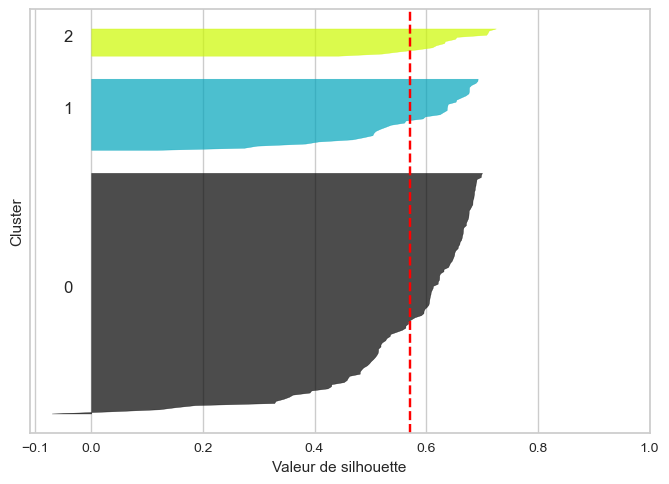

In [179]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Charger vos données et effectuer votre clustering ici
# Par exemple, supposons que vous ayez déjà effectué un clustering avec KMeans
# kmeans = KMeans(n_clusters=5)
# labels = kmeans.fit_predict(vos_donnees)

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, labels)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, labels)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(labels))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


Score de silhouette moyen : 0.5705920456042998


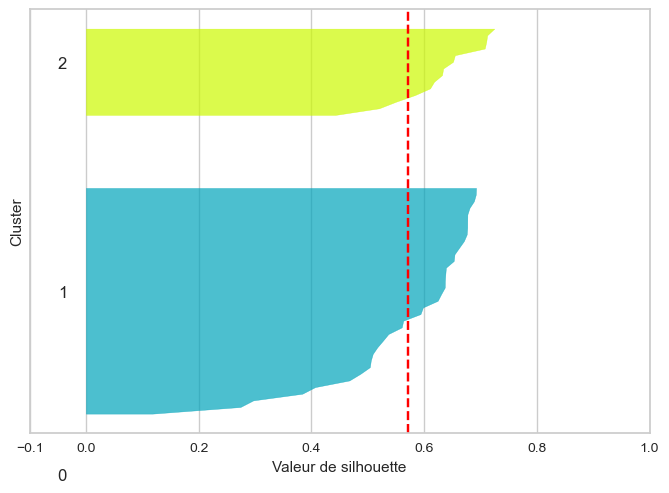

In [180]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculer le score de silhouette moyen
silhouette_avg = silhouette_score(df_test, clusters)
print(f"Score de silhouette moyen : {silhouette_avg}")

# Calculer les scores de silhouette individuels pour chaque échantillon
sample_silhouette_values = silhouette_samples(df_test, clusters)

# Créer un silhouette plot
fig, ax = plt.subplots()
y_lower = 10

for i in range(len(np.unique(clusters))):
    # Aggrège les scores de silhouette pour les échantillons appartenant à un cluster particulier
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / len(np.unique(clusters)))
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiqueter chaque cluster avec son numéro au milieu
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calculer la nouvelle position y_lower pour le prochain plot
    y_lower = y_upper + 10

ax.set_xlabel("Valeur de silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


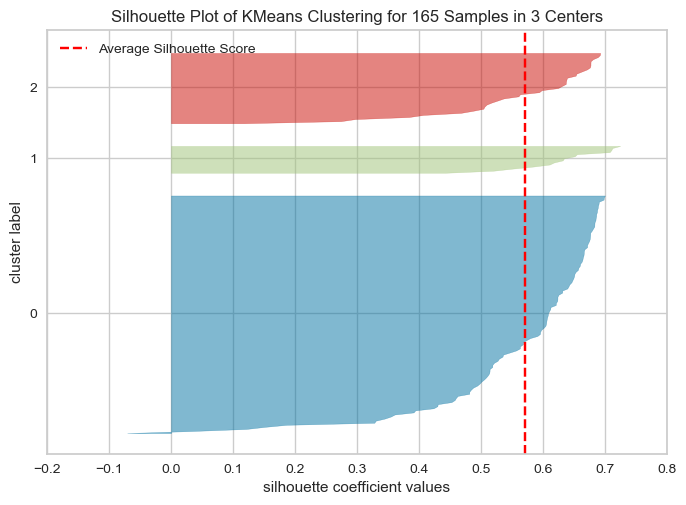

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 165 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [181]:
# ! pip install yellowbrick

from yellowbrick.cluster import silhouette_visualizer

# Specify rows to cluster: under 40 y/o and have either graduate or university education
# X = df[(df['F1'] <= 1) & (df['F2']>=1)]
X = df_test
# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(3, random_state=42), X, colors='yellowbrick')

## ARI

In [182]:
from sklearn.metrics import adjusted_rand_score
kmeans_labels = kmeans.labels_
dendogram_labels = labels
# Assuming you have two sets of labels: true_labels and predicted_labels
ari = adjusted_rand_score(kmeans_labels, dendogram_labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 1.0


# Etude des clusters

### Fonctions pour l'étude des clusters

In [183]:
from math import pi
def get_cluster_data(data, cluster_column, cluster_value):
    """Renvoie un sous-ensemble de données pour le cluster spécifié."""
    return data[data[cluster_column] == cluster_value]

def radar_plot(cluster_data):
    """Crée un radar plot pour les variables numériques du cluster."""
    numeric_columns = cluster_data.select_dtypes(include='number').columns
    stats = cluster_data[numeric_columns].mean().tolist()
    stats += stats[:1]  # repeat the first value to close the circular graph
    angles = [n / float(len(numeric_columns)) * 2 * pi for n in range(len(numeric_columns))]
    angles += angles[:1]
    plt.polar(angles, stats)
    plt.fill(angles, stats, 'teal', alpha=0.1)
    plt.xticks(angles[:-1], numeric_columns)
    plt.show()

def plot_boxplot(data):
    """Crée un boxplot pour toutes les colonnes numériques côte à côte."""
    numeric_columns = data.select_dtypes(include='number').columns
    sns.boxplot(data=data[numeric_columns])
    plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.show()

def descriptive_statistics(cluster_data):
    """Affiche les statistiques descriptives pour les colonnes numériques du cluster."""
    numeric_columns = cluster_data.select_dtypes(include='number')
    print(numeric_columns.describe())
    
def analyze_cluster(data, cluster_column, cluster_value):
    """Analyse un cluster spécifié en appelant toutes les fonctions."""
    cluster_data = get_cluster_data(data, cluster_column, cluster_value)
    print("Boxplot des colonnes numériques :")
    plot_boxplot(cluster_data)
    print("Radar plot des colonnes numériques :")
    radar_plot(cluster_data)
    # print("Statistiques descriptives des colonnes numériques :")
    # descriptive_statistics(cluster_data)    

Création des datframes à partir des clusters

In [184]:
# Créez des DataFrames pour chaque cluster Kmeans
cluster_1_kmeans = get_cluster_data(data_reconstructed, 'cluster_kmeans', '1')
cluster_2_kmeans = get_cluster_data(data_reconstructed, 'cluster_kmeans', '2')
cluster_3_kmeans = get_cluster_data(data_reconstructed, 'cluster_kmeans', '0')

# Créez des DataFrames pour chaque cluster dendogramme
cluster_1_dd = get_cluster_data(data_reconstructed, 'cluster_dd', '1')
cluster_2_dd = get_cluster_data(data_reconstructed, 'cluster_dd', '2')
cluster_3_dd = get_cluster_data(data_reconstructed, 'cluster_dd', '3')

## Kmeans

### CLuster Kmeans 1

Boxplot des colonnes numériques :


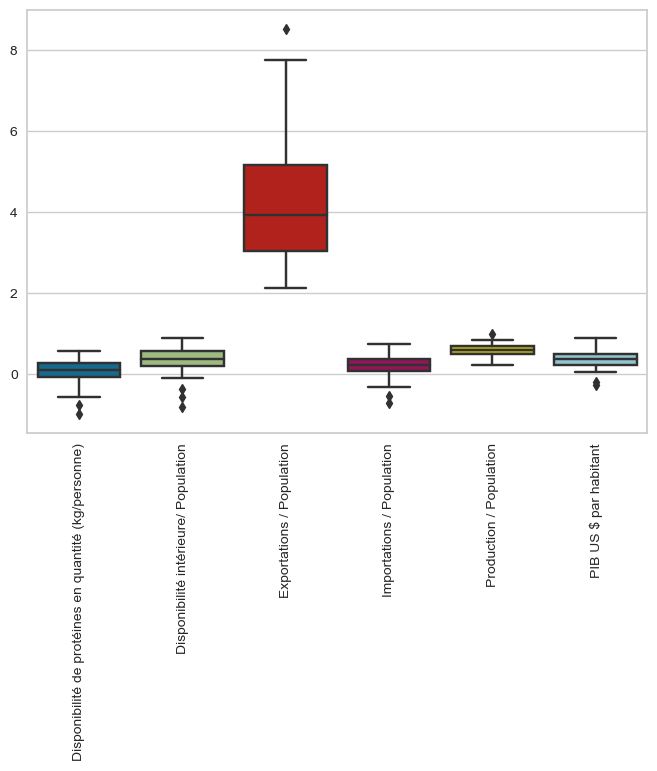

Radar plot des colonnes numériques :


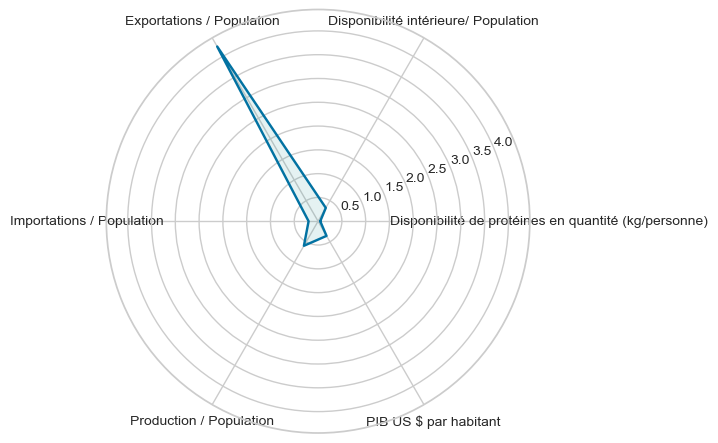

In [185]:
analyze_cluster(data_reconstructed, 'cluster_kmeans', '1')

In [186]:
cluster_1_kmeans.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.045560,0.324844,4.240023,0.199110,0.595289,0.355088
std,0.334094,0.362886,1.533055,0.306257,0.162841,0.239091
min,-0.985785,-0.801099,2.136401,-0.715262,0.229033,-0.267018
25%,-0.068243,0.200419,3.048558,0.080558,0.505350,0.233149
50%,0.093578,0.379728,3.941187,0.229788,0.588209,0.372185
75%,0.269008,0.568573,5.173170,0.388395,0.703477,0.504525
max,0.573905,0.886505,8.521380,0.740701,1.002791,0.889527


In [187]:
cluster_1_kmeans.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
4,Allemagne,1,1,-0.083847,0.184751,3.941187,0.078662,0.532151,0.260171
8,Argentine,1,1,-0.205630,0.055111,3.007191,-0.045313,0.440808,0.139520
11,Autriche,1,1,0.143939,0.432387,4.158658,0.285656,0.628197,0.412439
16,Belgique,1,1,0.113139,0.386677,7.758157,0.316732,0.792697,0.566002
21,Brésil,1,1,-0.570762,-0.352465,5.812822,-0.325778,0.441121,0.046811


Ce cluster est les pays exportateur de poulet, pas intéressant pour notre étude

### Cluster Kmeans 2

Boxplot des colonnes numériques :


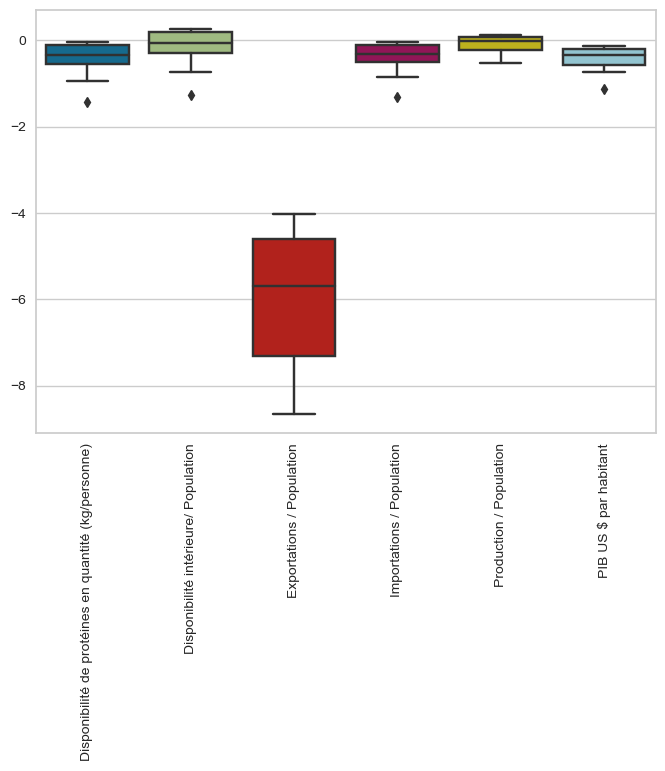

Radar plot des colonnes numériques :


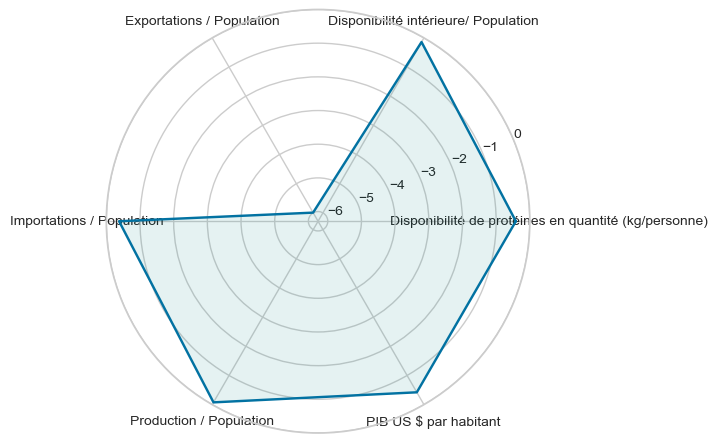

In [188]:
analyze_cluster(data_reconstructed, 'cluster_kmeans', '2')

In [189]:
cluster_2_kmeans.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,-0.414803,-0.142643,-5.991832,-0.378609,-0.077756,-0.422585
std,0.399502,0.433384,1.609496,0.368440,0.195944,0.289387
min,-1.439545,-1.254942,-8.661592,-1.318223,-0.535107,-1.132392
25%,-0.556178,-0.289398,-7.305643,-0.512232,-0.212485,-0.569331
50%,-0.333750,-0.052756,-5.694175,-0.304465,-0.017550,-0.342734
75%,-0.110822,0.187216,-4.596452,-0.099423,0.085259,-0.207076
max,-0.045244,0.259746,-4.016799,-0.028688,0.120426,-0.133983


In [190]:
cluster_2_kmeans.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
18,Bolivie (État plurinational de),2,2,-0.187853,0.099914,-4.537623,-0.152233,0.078463,-0.211486
35,Colombie,2,2,-0.089968,0.211642,-6.021362,-0.088953,0.042597,-0.221742
62,Honduras,2,2,-0.199675,0.086095,-4.261722,-0.158302,0.087525,-0.205607
72,Japon,2,2,-0.045244,0.256202,-4.772937,-0.028688,0.120426,-0.133983
91,Maroc,2,2,-0.531710,-0.267519,-6.762004,-0.495564,-0.159259,-0.532338


Ce cluster est un regroupemetn de pays qui produisent beaucoup de poulet

### Cluster Kmeans 3

Boxplot des colonnes numériques :


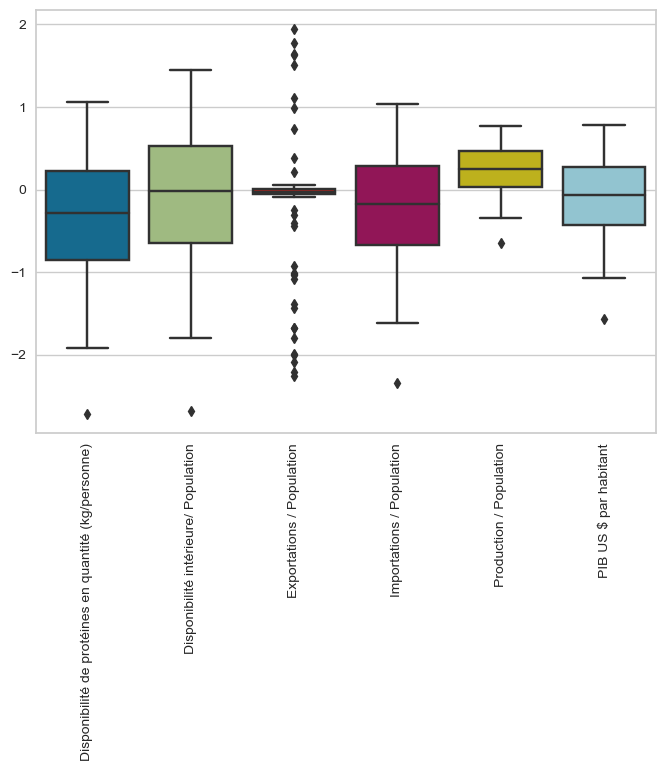

Radar plot des colonnes numériques :


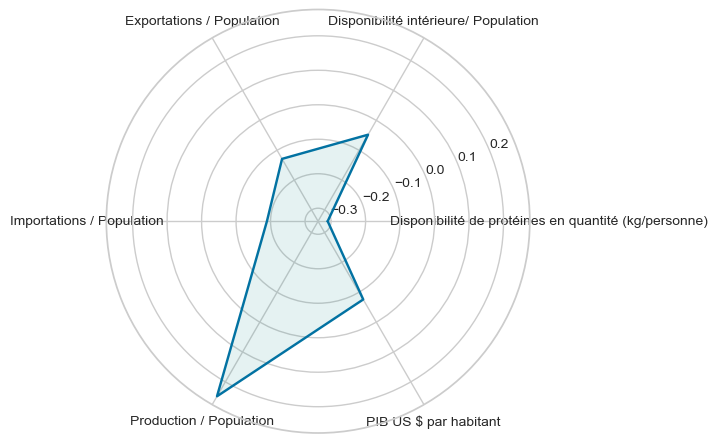

In [191]:
analyze_cluster(data_reconstructed, 'cluster_kmeans', '0')

In [192]:
cluster_3_kmeans.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,-0.309851,-0.047961,-0.128906,-0.189444,0.248346,-0.075875
std,0.762290,0.831250,0.701013,0.680584,0.286753,0.474732
min,-2.718143,-2.674416,-2.250846,-2.337800,-0.646583,-1.567493
25%,-0.853573,-0.641121,-0.057521,-0.676059,0.037444,-0.429207
50%,-0.287921,-0.021090,-0.027345,-0.179597,0.247406,-0.064507
75%,0.221670,0.531293,0.002071,0.287856,0.472109,0.277688
max,1.062008,1.447650,1.942945,1.036868,0.765714,0.781248


In [193]:
cluster_3_kmeans.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
0,Afghanistan,0,3,-1.415015,-1.253351,-0.020273,-1.174788,-0.160726,-0.758798
1,Afrique du Sud,0,3,0.070821,0.365958,0.212453,0.156121,0.407776,0.177534
2,Albanie,0,3,0.034924,0.327660,-0.037857,0.119984,0.382074,0.143170
3,Algérie,0,3,-1.151286,-0.965867,0.001977,-0.938868,-0.060751,-0.593518
5,Angola,0,3,-0.426333,-0.175338,-0.019122,-0.291697,0.210040,-0.143135


Trop de pays

## Dendogramme

### Cluster Dendogramme 1

Boxplot des colonnes numériques :


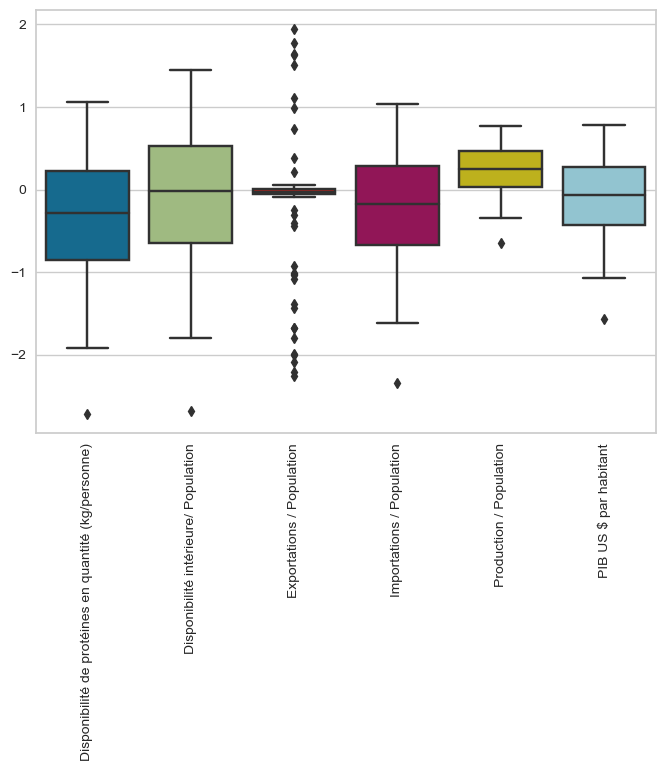

Radar plot des colonnes numériques :


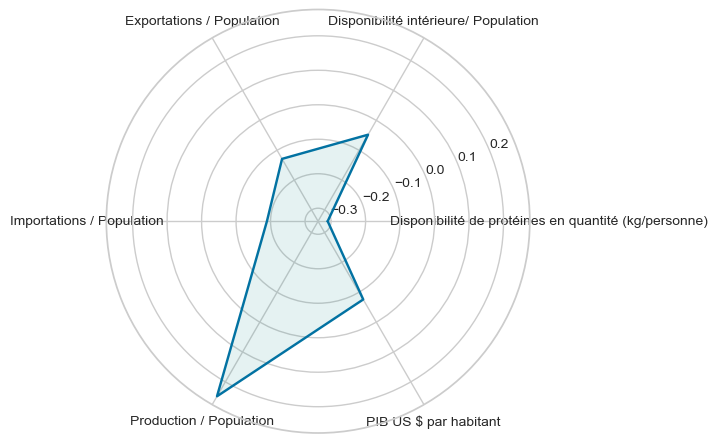

In [194]:
analyze_cluster(data_reconstructed, 'cluster_dd', '3')

In [195]:
cluster_1_dd.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.045560,0.324844,4.240023,0.199110,0.595289,0.355088
std,0.334094,0.362886,1.533055,0.306257,0.162841,0.239091
min,-0.985785,-0.801099,2.136401,-0.715262,0.229033,-0.267018
25%,-0.068243,0.200419,3.048558,0.080558,0.505350,0.233149
50%,0.093578,0.379728,3.941187,0.229788,0.588209,0.372185
75%,0.269008,0.568573,5.173170,0.388395,0.703477,0.504525
max,0.573905,0.886505,8.521380,0.740701,1.002791,0.889527


In [196]:
cluster_1_dd.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
4,Allemagne,1,1,-0.083847,0.184751,3.941187,0.078662,0.532151,0.260171
8,Argentine,1,1,-0.205630,0.055111,3.007191,-0.045313,0.440808,0.139520
11,Autriche,1,1,0.143939,0.432387,4.158658,0.285656,0.628197,0.412439
16,Belgique,1,1,0.113139,0.386677,7.758157,0.316732,0.792697,0.566002
21,Brésil,1,1,-0.570762,-0.352465,5.812822,-0.325778,0.441121,0.046811


Pays exportateur pas interessant

### Cluster Dendogramme 2

Boxplot des colonnes numériques :


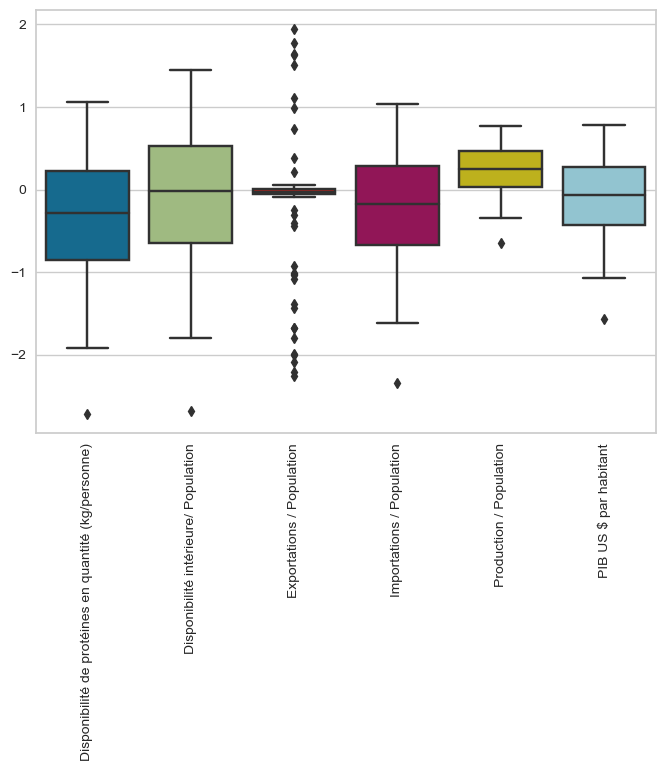

Radar plot des colonnes numériques :


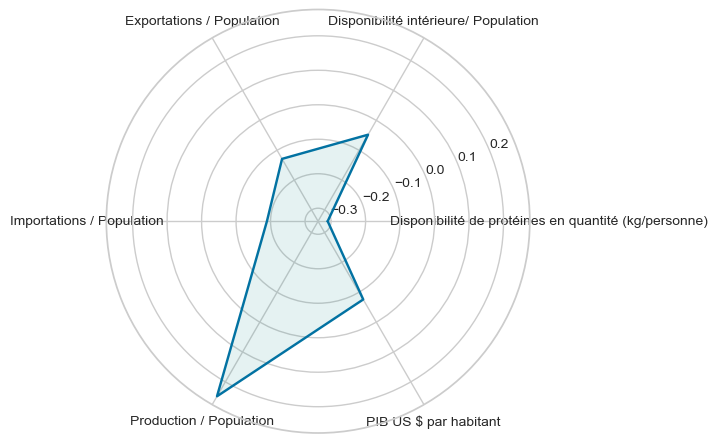

In [197]:
analyze_cluster(data_reconstructed, 'cluster_dd', '3')

In [198]:
cluster_2_dd.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,-0.414803,-0.142643,-5.991832,-0.378609,-0.077756,-0.422585
std,0.399502,0.433384,1.609496,0.368440,0.195944,0.289387
min,-1.439545,-1.254942,-8.661592,-1.318223,-0.535107,-1.132392
25%,-0.556178,-0.289398,-7.305643,-0.512232,-0.212485,-0.569331
50%,-0.333750,-0.052756,-5.694175,-0.304465,-0.017550,-0.342734
75%,-0.110822,0.187216,-4.596452,-0.099423,0.085259,-0.207076
max,-0.045244,0.259746,-4.016799,-0.028688,0.120426,-0.133983


In [199]:
cluster_2_dd.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
18,Bolivie (État plurinational de),2,2,-0.187853,0.099914,-4.537623,-0.152233,0.078463,-0.211486
35,Colombie,2,2,-0.089968,0.211642,-6.021362,-0.088953,0.042597,-0.221742
62,Honduras,2,2,-0.199675,0.086095,-4.261722,-0.158302,0.087525,-0.205607
72,Japon,2,2,-0.045244,0.256202,-4.772937,-0.028688,0.120426,-0.133983
91,Maroc,2,2,-0.531710,-0.267519,-6.762004,-0.495564,-0.159259,-0.532338


peu de prod, pas d'exportations , bon cluster

### Cluster Dendogramme 3

Boxplot des colonnes numériques :


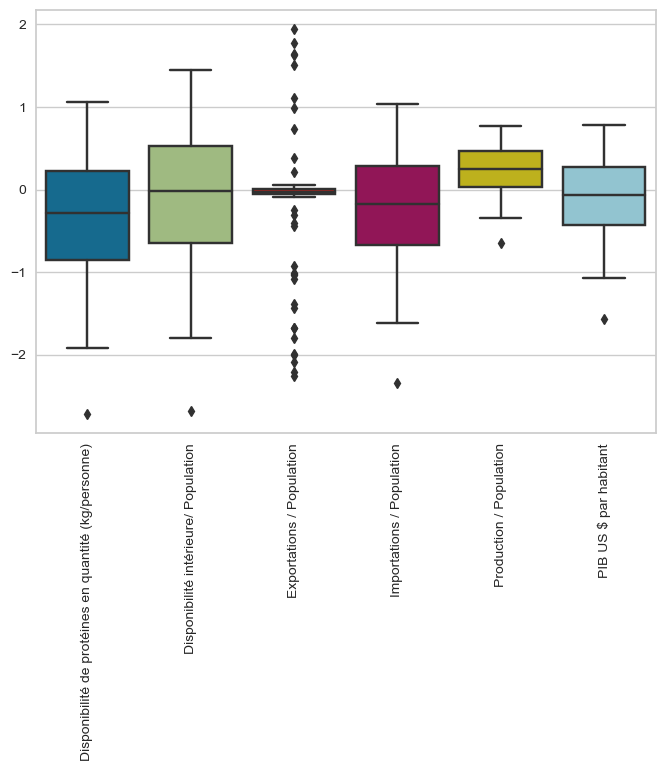

Radar plot des colonnes numériques :


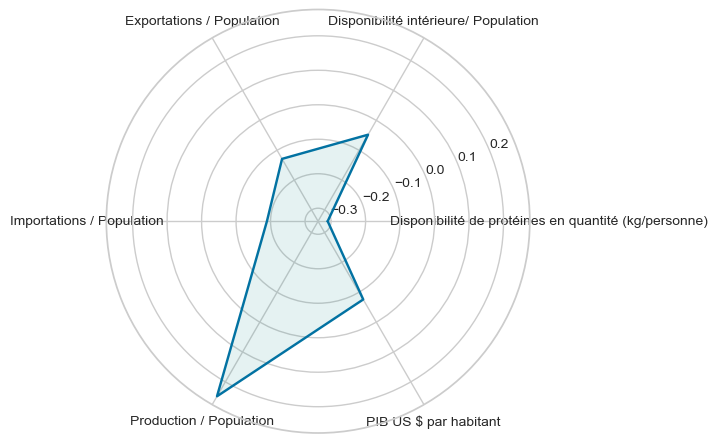

In [200]:
analyze_cluster(data_reconstructed, 'cluster_dd' , '3')

In [201]:
cluster_3_dd.describe()

,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,-0.309851,-0.047961,-0.128906,-0.189444,0.248346,-0.075875
std,0.762290,0.831250,0.701013,0.680584,0.286753,0.474732
min,-2.718143,-2.674416,-2.250846,-2.337800,-0.646583,-1.567493
25%,-0.853573,-0.641121,-0.057521,-0.676059,0.037444,-0.429207
50%,-0.287921,-0.021090,-0.027345,-0.179597,0.247406,-0.064507
75%,0.221670,0.531293,0.002071,0.287856,0.472109,0.277688
max,1.062008,1.447650,1.942945,1.036868,0.765714,0.781248


In [202]:
cluster_3_dd.head()

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
0,Afghanistan,0,3,-1.415015,-1.253351,-0.020273,-1.174788,-0.160726,-0.758798
1,Afrique du Sud,0,3,0.070821,0.365958,0.212453,0.156121,0.407776,0.177534
2,Albanie,0,3,0.034924,0.327660,-0.037857,0.119984,0.382074,0.143170
3,Algérie,0,3,-1.151286,-0.965867,0.001977,-0.938868,-0.060751,-0.593518
5,Angola,0,3,-0.426333,-0.175338,-0.019122,-0.291697,0.210040,-0.143135


Trop de prod

# Sélection des pays

In [203]:
cluster_2_dd

,Pays,cluster_kmeans,cluster_dd,Disponibilité de protéines en quantité (kg/personne),Disponibilité intérieure/ Population,Exportations / Population,Importations / Population,Production / Population,PIB US $ par habitant
18,Bolivie (État plurinational de),2,2,-0.187853,0.099914,-4.537623,-0.152233,0.078463,-0.211486
35,Colombie,2,2,-0.089968,0.211642,-6.021362,-0.088953,0.042597,-0.221742
62,Honduras,2,2,-0.199675,0.086095,-4.261722,-0.158302,0.087525,-0.205607
72,Japon,2,2,-0.045244,0.256202,-4.772937,-0.028688,0.120426,-0.133983
91,Maroc,2,2,-0.531710,-0.267519,-6.762004,-0.495564,-0.159259,-0.532338
94,Mexique,2,2,-0.048459,0.253271,-4.943495,-0.034335,0.110879,-0.144170
109,Pakistan,2,2,-1.439545,-1.254942,-7.486856,-1.318223,-0.535107,-1.132392
112,Philippines,2,2,-0.467887,-0.195430,-7.503561,-0.450627,-0.171598,-0.528186
116,Pérou,2,2,-0.047223,0.259746,-6.465264,-0.057999,0.036914,-0.216430
121,République de Corée,2,2,-0.173382,0.113938,-4.016799,-0.130831,0.109362,-0.177481
